# (Keras) Cornell Movie Review Dataset

Based on https://github.com/yaringal/BayesianRNN/blob/master/Example/sentiment_lstm_regression.py

In [1]:
import numpy as np
from tensorflow.contrib.keras.python.keras.optimizers import SGD, RMSprop, Adagrad
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers.core import Dense, Dropout
from tensorflow.contrib.keras.python.keras.layers.embeddings import Embedding
from tensorflow.contrib.keras.python.keras.layers.recurrent import LSTM, GRU, SimpleRNN
from tensorflow.contrib.keras.python.keras.regularizers import l2
from tensorflow.contrib.keras.python.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from yaringal_callbacks import ModelTest
from yaringal_dataset import loader

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8, 5)

# Global params:
NB_WORDS = 20000
SKIP_TOP = 0
TEST_SPLIT = 0.2
INIT_SEED = 2017
GLOBAL_SEED = 2018
MAXLEN = 200
BATCH_SIZE = 128
TEST_BATCH_SIZE = 512

In [2]:
dataset = loader(INIT_SEED, MAXLEN, NB_WORDS, SKIP_TOP, TEST_SPLIT)

X_train, X_test, Y_train, Y_test = dataset.X_train, dataset.X_test, dataset.Y_train, dataset.Y_test
mean_y_train, std_y_train = dataset.mean_y_train, dataset.std_y_train

10620 train sequences
2655 test sequences
Pad sequences (samples x time)
X_train shape: (10620, 200)
X_test shape: (2655, 200)


In [3]:
def get_model(idrop=0.2, edrop=0.1, odrop=0.25, rdrop=0.2, weight_decay=1e-4, lr=1e-3):
    model = Sequential()
    model.add(Embedding(NB_WORDS, 128, embeddings_regularizer=l2(weight_decay),
                        input_length=MAXLEN)) 
    if edrop:
        model.add(Dropout(edrop))
    model.add(LSTM(128, kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                   bias_regularizer=l2(weight_decay), dropout=idrop, recurrent_dropout=rdrop))
    if odrop:
        model.add(Dropout(odrop))
    model.add(Dense(1, kernel_regularizer=l2(weight_decay),
                    bias_regularizer=l2(weight_decay)))
    optimizer = Adam(lr)
    model.compile(loss='mse', metrics=["mse"], optimizer=optimizer)
    return model

## Normal Variational LSTM (w/o Embedding Dropout)

In [4]:
print('Build model...')
model = get_model(rdrop=0.25, odrop=0.25, edrop=0, idrop=0.25, weight_decay=1e-4, lr=1e-3)

Build model...


In [5]:
modeltest_1 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=2, verbose=0, T=10,
                        mean_y_train=mean_y_train, std_y_train=std_y_train,
                        loss='euclidean', batch_size=TEST_BATCH_SIZE)

In [6]:
history_1 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=200, callbacks=[modeltest_1])

Epoch 1/200
Standard error at epoch 000: 1.0040/0.1857
MC error at epoch 000: 1.0064/0.1859
15s - loss: 76.7824 - mean_squared_error: 1.0282
Epoch 2/200
11s - loss: 59.7187 - mean_squared_error: 1.0073
Epoch 3/200
Standard error at epoch 002: 1.0038/0.1856
MC error at epoch 002: 1.0048/0.1857
14s - loss: 46.2964 - mean_squared_error: 1.0051
Epoch 4/200
11s - loss: 35.7194 - mean_squared_error: 1.0037
Epoch 5/200
Standard error at epoch 004: 1.0056/0.1858
MC error at epoch 004: 1.0067/0.1859
14s - loss: 27.4081 - mean_squared_error: 0.9986
Epoch 6/200
11s - loss: 20.9169 - mean_squared_error: 0.9945
Epoch 7/200
Standard error at epoch 006: 1.0006/0.1853
MC error at epoch 006: 1.0023/0.1855
14s - loss: 15.8839 - mean_squared_error: 0.9916
Epoch 8/200
11s - loss: 12.0078 - mean_squared_error: 0.9824
Epoch 9/200
Standard error at epoch 008: 0.9954/0.1849
MC error at epoch 008: 0.9967/0.1850
14s - loss: 9.0588 - mean_squared_error: 0.9768
Epoch 10/200
11s - loss: 6.8289 - mean_squared_error

11s - loss: 0.1898 - mean_squared_error: 0.0938
Epoch 83/200
Standard error at epoch 082: 0.7009/0.1551
MC error at epoch 082: 0.6929/0.1542
14s - loss: 0.1904 - mean_squared_error: 0.0951
Epoch 84/200
11s - loss: 0.1919 - mean_squared_error: 0.0965
Epoch 85/200
Standard error at epoch 084: 0.6783/0.1526
MC error at epoch 084: 0.6797/0.1528
14s - loss: 0.1936 - mean_squared_error: 0.0979
Epoch 86/200
11s - loss: 0.1936 - mean_squared_error: 0.0976
Epoch 87/200
Standard error at epoch 086: 0.6898/0.1539
MC error at epoch 086: 0.6877/0.1536
14s - loss: 0.1869 - mean_squared_error: 0.0915
Epoch 88/200
11s - loss: 0.1889 - mean_squared_error: 0.0944
Epoch 89/200
Standard error at epoch 088: 0.6833/0.1532
MC error at epoch 088: 0.6797/0.1528
14s - loss: 0.1911 - mean_squared_error: 0.0964
Epoch 90/200
11s - loss: 0.1918 - mean_squared_error: 0.0971
Epoch 91/200
Standard error at epoch 090: 0.6814/0.1530
MC error at epoch 090: 0.6768/0.1524
14s - loss: 0.1886 - mean_squared_error: 0.0944
Epo

Standard error at epoch 162: 0.6687/0.1515
MC error at epoch 162: 0.6637/0.1509
14s - loss: 0.1706 - mean_squared_error: 0.0820
Epoch 164/200
11s - loss: 0.1682 - mean_squared_error: 0.0807
Epoch 165/200
Standard error at epoch 164: 0.6683/0.1515
MC error at epoch 164: 0.6635/0.1509
14s - loss: 0.1721 - mean_squared_error: 0.0849
Epoch 166/200
11s - loss: 0.1687 - mean_squared_error: 0.0809
Epoch 167/200
Standard error at epoch 166: 0.6711/0.1518
MC error at epoch 166: 0.6676/0.1514
14s - loss: 0.1679 - mean_squared_error: 0.0809
Epoch 168/200
11s - loss: 0.1668 - mean_squared_error: 0.0808
Epoch 169/200
Standard error at epoch 168: 0.6823/0.1530
MC error at epoch 168: 0.6764/0.1524
14s - loss: 0.1667 - mean_squared_error: 0.0807
Epoch 170/200
11s - loss: 0.1837 - mean_squared_error: 0.0961
Epoch 171/200
Standard error at epoch 170: 0.6656/0.1512
MC error at epoch 170: 0.6634/0.1509
14s - loss: 0.1822 - mean_squared_error: 0.0907
Epoch 172/200
11s - loss: 0.1752 - mean_squared_error: 0

In [24]:
print("Best RMSE: {:.4f} Best Epoch: {}".format(
    np.min([x[1] ** 0.5 for x in modeltest_1.history]), 
    (np.argmin([x[1] ** 0.5 for x in modeltest_1.history]) + 1)*2
))

Best RMSE: 0.1503 Best Epoch: 180


## Standard LSTM w/o Dropout

In [10]:
print('Build model...')
model = get_model(edrop=0, rdrop=0, odrop=0, idrop=0, weight_decay=1e-10, lr=1e-3)

Build model...


In [11]:
modeltest_2 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=2, verbose=0, T=1,
                        mean_y_train=mean_y_train, std_y_train=std_y_train,
                        loss='euclidean', batch_size=TEST_BATCH_SIZE)

In [12]:
history_2 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=200, callbacks=[modeltest_2]
)

Epoch 1/200
Standard error at epoch 000: 1.0037/0.1856
MC error at epoch 000: 1.0037/0.1856
12s - loss: 1.0221 - mean_squared_error: 1.0220
Epoch 2/200
11s - loss: 0.9974 - mean_squared_error: 0.9973
Epoch 3/200
Standard error at epoch 002: 0.9893/0.1843
MC error at epoch 002: 0.9893/0.1843
12s - loss: 0.9676 - mean_squared_error: 0.9675
Epoch 4/200
11s - loss: 0.8916 - mean_squared_error: 0.8915
Epoch 5/200
Standard error at epoch 004: 0.7380/0.1592
MC error at epoch 004: 0.7380/0.1592
12s - loss: 0.6700 - mean_squared_error: 0.6699
Epoch 6/200
11s - loss: 0.4326 - mean_squared_error: 0.4325
Epoch 7/200
Standard error at epoch 006: 0.7081/0.1559
MC error at epoch 006: 0.7081/0.1559
12s - loss: 0.3097 - mean_squared_error: 0.3096
Epoch 8/200
11s - loss: 0.2355 - mean_squared_error: 0.2354
Epoch 9/200
Standard error at epoch 008: 0.7181/0.1570
MC error at epoch 008: 0.7181/0.1570
12s - loss: 0.1798 - mean_squared_error: 0.1797
Epoch 10/200
11s - loss: 0.1473 - mean_squared_error: 0.1472

12s - loss: 0.0219 - mean_squared_error: 0.0218
Epoch 83/200
Standard error at epoch 082: 0.8369/0.1695
MC error at epoch 082: 0.8369/0.1695
12s - loss: 0.0239 - mean_squared_error: 0.0238
Epoch 84/200
12s - loss: 0.0229 - mean_squared_error: 0.0228
Epoch 85/200
Standard error at epoch 084: 0.8380/0.1696
MC error at epoch 084: 0.8380/0.1696
12s - loss: 0.0222 - mean_squared_error: 0.0221
Epoch 86/200
12s - loss: 0.0233 - mean_squared_error: 0.0232
Epoch 87/200
Standard error at epoch 086: 0.8300/0.1688
MC error at epoch 086: 0.8300/0.1688
12s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 88/200
12s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 89/200
Standard error at epoch 088: 0.8452/0.1703
MC error at epoch 088: 0.8452/0.1703
12s - loss: 0.0254 - mean_squared_error: 0.0253
Epoch 90/200
12s - loss: 0.0244 - mean_squared_error: 0.0243
Epoch 91/200
Standard error at epoch 090: 0.8329/0.1691
MC error at epoch 090: 0.8329/0.1691
12s - loss: 0.0231 - mean_squared_error: 0.0230
Epo

Standard error at epoch 162: 0.8084/0.1666
MC error at epoch 162: 0.8084/0.1666
12s - loss: 0.0175 - mean_squared_error: 0.0174
Epoch 164/200
11s - loss: 0.0178 - mean_squared_error: 0.0177
Epoch 165/200
Standard error at epoch 164: 0.8343/0.1692
MC error at epoch 164: 0.8343/0.1692
12s - loss: 0.0171 - mean_squared_error: 0.0170
Epoch 166/200
12s - loss: 0.0174 - mean_squared_error: 0.0173
Epoch 167/200
Standard error at epoch 166: 0.8435/0.1702
MC error at epoch 166: 0.8435/0.1702
12s - loss: 0.0170 - mean_squared_error: 0.0169
Epoch 168/200
12s - loss: 0.0169 - mean_squared_error: 0.0168
Epoch 169/200
Standard error at epoch 168: 0.8110/0.1669
MC error at epoch 168: 0.8110/0.1669
12s - loss: 0.0176 - mean_squared_error: 0.0175
Epoch 170/200
11s - loss: 0.0171 - mean_squared_error: 0.0170
Epoch 171/200
Standard error at epoch 170: 0.8201/0.1678
MC error at epoch 170: 0.8201/0.1678
12s - loss: 0.0176 - mean_squared_error: 0.0175
Epoch 172/200
12s - loss: 0.0174 - mean_squared_error: 0

In [25]:
print("Best RMSE: {:.4f} Best Epoch: {}".format(
    np.min([x[1] ** 0.5 for x in modeltest_2.history]), 
    (np.argmin([x[1] ** 0.5 for x in modeltest_2.history]) + 1)*2
))

Best RMSE: 0.1559 Best Epoch: 8


## LSTM with Standard Dropout (different mask at differnt time steps)

In [13]:
print('Build model...')
model = get_model(edrop=0.3, rdrop=0, odrop=0.3, idrop=0, weight_decay=1e-4, lr=1e-3)

Build model...


In [14]:
modeltest_3 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=2, verbose=0, T=10,
                        mean_y_train=mean_y_train, std_y_train=std_y_train,
                        loss='euclidean', batch_size=TEST_BATCH_SIZE)

In [15]:
history_3 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=200, callbacks=[modeltest_3])

Epoch 1/200
Standard error at epoch 000: 1.0070/0.1859
MC error at epoch 000: 1.0068/0.1859
14s - loss: 76.7270 - mean_squared_error: 1.0347
Epoch 2/200
11s - loss: 59.6876 - mean_squared_error: 1.0039
Epoch 3/200
Standard error at epoch 002: 1.0091/0.1861
MC error at epoch 002: 1.0086/0.1861
14s - loss: 46.2750 - mean_squared_error: 0.9993
Epoch 4/200
11s - loss: 35.7048 - mean_squared_error: 0.9974
Epoch 5/200
Standard error at epoch 004: 1.0013/0.1854
MC error at epoch 004: 1.0014/0.1854
14s - loss: 27.4043 - mean_squared_error: 0.9963
Epoch 6/200
11s - loss: 20.9170 - mean_squared_error: 0.9887
Epoch 7/200
Standard error at epoch 006: 0.9632/0.1818
MC error at epoch 006: 0.9662/0.1821
14s - loss: 15.8819 - mean_squared_error: 0.9751
Epoch 8/200
11s - loss: 12.0042 - mean_squared_error: 0.9417
Epoch 9/200
Standard error at epoch 008: 0.7466/0.1601
MC error at epoch 008: 0.7558/0.1611
14s - loss: 9.0166 - mean_squared_error: 0.8642
Epoch 10/200
11s - loss: 6.6235 - mean_squared_error

11s - loss: 0.1521 - mean_squared_error: 0.0747
Epoch 83/200
Standard error at epoch 082: 0.6655/0.1512
MC error at epoch 082: 0.6632/0.1509
14s - loss: 0.1501 - mean_squared_error: 0.0735
Epoch 84/200
11s - loss: 0.1520 - mean_squared_error: 0.0754
Epoch 85/200
Standard error at epoch 084: 0.6508/0.1495
MC error at epoch 084: 0.6494/0.1493
14s - loss: 0.1507 - mean_squared_error: 0.0745
Epoch 86/200
11s - loss: 0.1501 - mean_squared_error: 0.0739
Epoch 87/200
Standard error at epoch 086: 0.6470/0.1490
MC error at epoch 086: 0.6455/0.1489
14s - loss: 0.1508 - mean_squared_error: 0.0750
Epoch 88/200
11s - loss: 0.1514 - mean_squared_error: 0.0756
Epoch 89/200
Standard error at epoch 088: 0.6370/0.1479
MC error at epoch 088: 0.6376/0.1479
14s - loss: 0.1508 - mean_squared_error: 0.0751
Epoch 90/200
11s - loss: 0.1475 - mean_squared_error: 0.0723
Epoch 91/200
Standard error at epoch 090: 0.6579/0.1503
MC error at epoch 090: 0.6580/0.1503
14s - loss: 0.1472 - mean_squared_error: 0.0725
Epo

Standard error at epoch 162: 0.6458/0.1489
MC error at epoch 162: 0.6421/0.1485
14s - loss: 0.1326 - mean_squared_error: 0.0679
Epoch 164/200
11s - loss: 0.1319 - mean_squared_error: 0.0673
Epoch 165/200
Standard error at epoch 164: 0.6436/0.1486
MC error at epoch 164: 0.6402/0.1483
14s - loss: 0.1315 - mean_squared_error: 0.0668
Epoch 166/200
11s - loss: 0.1320 - mean_squared_error: 0.0673
Epoch 167/200
Standard error at epoch 166: 0.6358/0.1477
MC error at epoch 166: 0.6324/0.1473
14s - loss: 0.1350 - mean_squared_error: 0.0700
Epoch 168/200
11s - loss: 0.1329 - mean_squared_error: 0.0676
Epoch 169/200
Standard error at epoch 168: 0.6582/0.1503
MC error at epoch 168: 0.6531/0.1497
14s - loss: 0.1312 - mean_squared_error: 0.0665
Epoch 170/200
11s - loss: 0.1318 - mean_squared_error: 0.0672
Epoch 171/200
Standard error at epoch 170: 0.6527/0.1497
MC error at epoch 170: 0.6497/0.1493
14s - loss: 0.1355 - mean_squared_error: 0.0703
Epoch 172/200
11s - loss: 0.1339 - mean_squared_error: 0

In [26]:
print("Best RMSE: {:.4f} Best Epoch: {}".format(
    np.min([x[1] ** 0.5 for x in modeltest_3.history]), 
    (np.argmin([x[1] ** 0.5 for x in modeltest_3.history]) + 1)*2
))

Best RMSE: 0.1425 Best Epoch: 12


## Visualizations

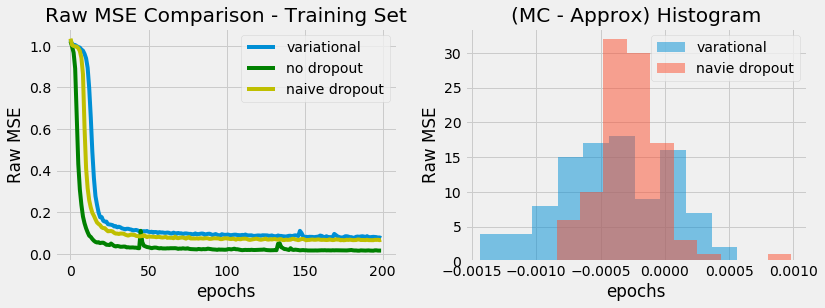

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Raw MSE Comparison - Training Set")
plt.plot(np.arange(len(history_1.history["mean_squared_error"])), 
         history_1.history["mean_squared_error"], label="variational")
plt.plot(np.arange(len(history_2.history["mean_squared_error"])), 
         history_2.history["mean_squared_error"], "g-", label="no dropout")
plt.plot(np.arange(len(history_3.history["mean_squared_error"])), 
         history_3.history["mean_squared_error"], "y-", label="naive dropout")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("Raw MSE")
plt.subplot(1, 2, 2)
plt.title("(MC - Approx) Histogram")
plt.hist([x[1] ** 0.5 - x[0] ** 0.5 for x in modeltest_1.history], alpha=0.5, label="varational")
plt.hist([x[1] ** 0.5 - x[0] ** 0.5 for x in modeltest_3.history], alpha=0.5, label="navie dropout")
plt.legend(loc='best')
plt.xlabel("Difference in Raw MSE")
plt.ylabel("Count")
plt.xticks(fontsize=8, rotation=0)

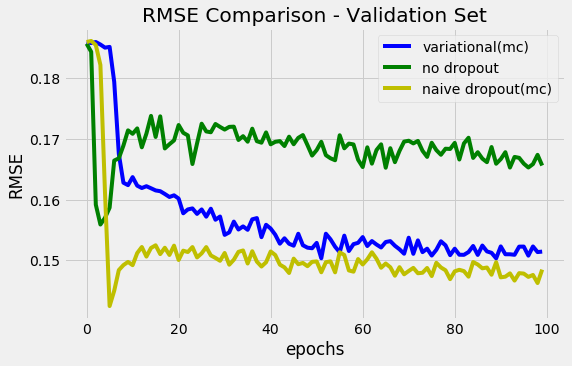

In [39]:
plt.title("RMSE Comparison - Validation Set")
plt.plot(np.arange(len(modeltest_1.history)), [x[1] ** 0.5 for x in modeltest_1.history], "b-", label="variational(mc)")
plt.plot(np.arange(len(modeltest_2.history)), [x[0] ** 0.5 for x in modeltest_2.history], "g-", label="no dropout")
plt.plot(np.arange(len(modeltest_3.history)), [x[1] ** 0.5 for x in modeltest_3.history], "y-", label="naive dropout(mc)")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("RMSE")